In [1]:
### Install these packages if they are not installed.
#!pip install mne
#!pip install yasa
#!pip install matplotlib

# base imports
import os
import sys

# get parent directory path to be able to import from parallel directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# imports from custom scripts
import data_visualization as dv
from pre_processing import basic_mne_functions as bmf

In [2]:
# epoch time in seconds
epoch = 30
# wake time (s) to save before first sleep and after last sleep
# (30 mins, so 30(s) * 60(s))
wake_time = 30 * 60
# which channels to extract
channels = ["Fpz-Cz", "Pz-Oz", "horizontal", "submental"]

# path to file containing the psg data you want to visualize
raw_psg = "C:/Users/andri/school/bio-informatics/internship/donders/data/human_test_data/input/raw_input/SC4481F0-PSG.edf"
# path to file containing annotation data
raw_hypno = "C:/Users/andri/school/bio-informatics/internship/donders/data/human_test_data/input/annotation_raw/SC4481FV-Hypnogram.edf"
# path to save the frequency band power output to
bandpower_output = "C:/Users/andri/school/bio-informatics/internship/donders/data/human_test_data/bandpower/bp_test.csv"


# visualize the data of the different channels in dataset.
raw_data = bmf.read_raw_psg(raw_psg, channels)
anno_data = bmf.extract_annotation(raw_hypno, raw_data)
cropped_raw_data = bmf.crop_data(raw_data, wake_time)

### comment this function to skip the interactive PSG plot
dv.plot_data(cropped_raw_data)

Extracting EDF parameters from C:\Users\andri\school\bio-informatics\internship\donders\data\human_test_data\input\raw_input\SC4481F0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8639999  =      0.000 ... 86399.990 secs...


c:\Users\andri\school\bio-informatics\internship\donders\vsc\Human_SleepSCoring\DilonAndriesse\pre_processing\basic_mne_functions.py:15: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(
c:\Users\andri\school\bio-informatics\internship\donders\vsc\Human_SleepSCoring\DilonAndriesse\pre_processing\basic_mne_functions.py:15: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(


First sleep starts at: 27390.0
Last sleep ends at: 85980.0
Cropping raw: 25590.0 - 86399.99
Cropping finished.
Using qt as 2D backend.


Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]


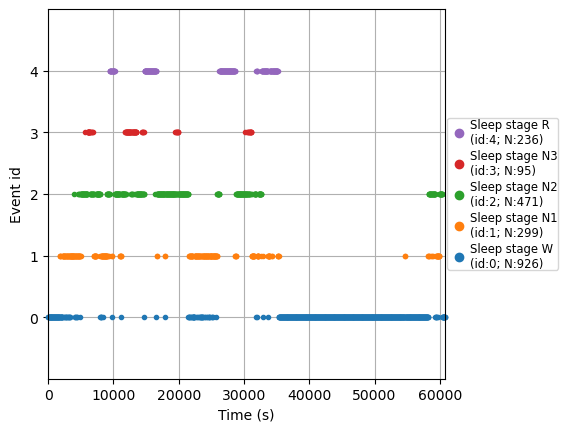

In [3]:
# visualize the distribution of epochs spend in certain sleep state
sleep_events = bmf.create_sleep_events(cropped_raw_data, epoch)
dv.plot_events(sleep_events, raw_data)

c:\Users\andri\miniconda3\envs\rodent_model\Lib\site-packages\yasa\plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


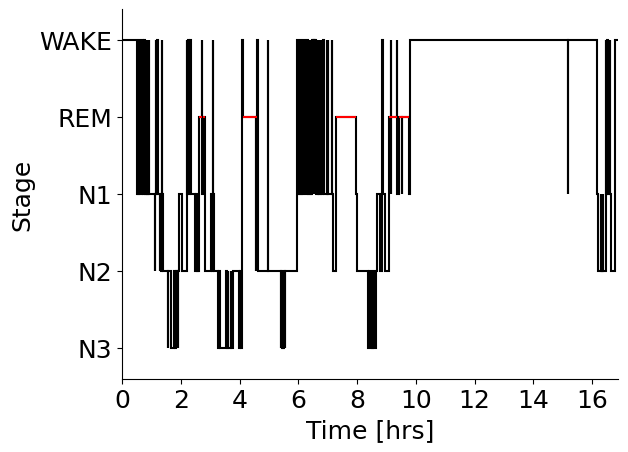

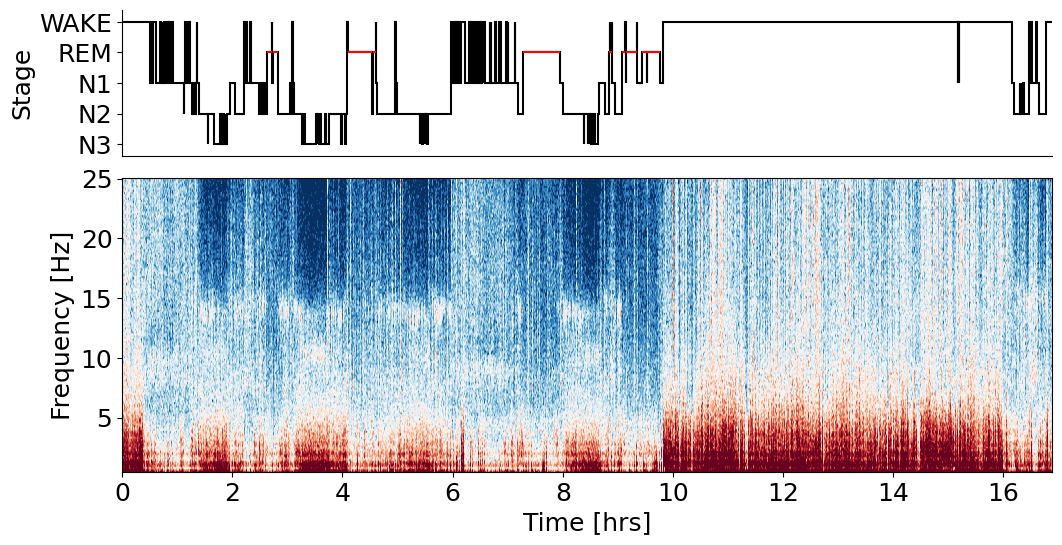

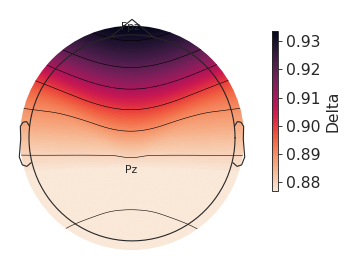

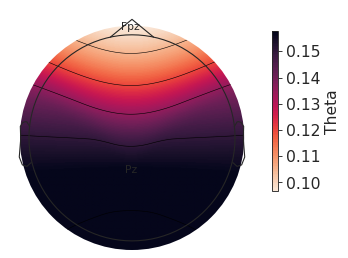

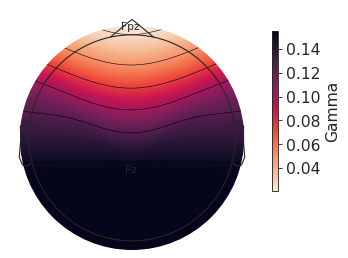

Channels marked as bad:
none


In [ ]:
# yasa visualization of hypnogram and spectrogram plot
hypno_up = dv.hypnogram_vis(raw_data, sleep_events)
dv.calc_bandpower(cropped_raw_data, hypno_up, bandpower_output)